# Post Pruning Decision Trees with Cost Complexity Pruning
---
**`DecisionTreeClassifier`** class provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on `validation scores`.

See also `minimal_cost_complexity_pruning` for details on pruning.

## Importing Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## Importing the Dataset
> The dataset `breast cancer` has been imported from `sklearn.datasets`

In [4]:
X, y = load_breast_cancer(return_X_y = True)

In [15]:
len(X)

569

> ## Splitting the dataset into Training and Test datasets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

> ## Fitting the Model

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

> ## Predicting the output and calculating the accuracy score

In [17]:
pred = clf.predict(X_test)

In [19]:
score = accuracy_score(y_test, pred)
score

0.8811188811188811

> ## Plotting the Decision Tree without Pruning

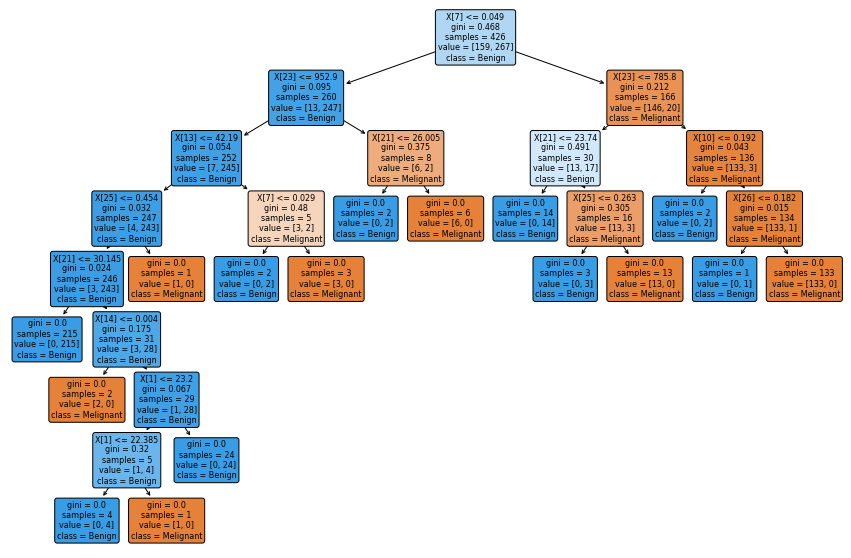

In [22]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, rounded=True, class_names=['Melignant', 'Benign']);

> ## Cost Complexity Pruning
Finding the `ccp_alphas` and `impurities`

In [23]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

> List of the Decision Trees with different `ccp_alphas`

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


> For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

In [36]:
ccp_alphas = ccp_alphas[:-1]

In [40]:
clfs = clfs[:-1]

> ## Accuracy vs alpha for training and testing sets
When `ccp_alpha` is set to zero and keeping the other default parameters of :class:`DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, pruning of the tree is increased, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

In [41]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

> Plotting `accuracies` with different `ccp_alphas`

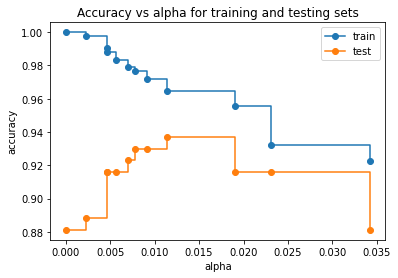

In [42]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [43]:
optimum_alpha = ccp_alphas[(ccp_alphas > 0.01) & (ccp_alphas < 0.015)]

In [44]:
optimum_alpha

array([0.01144366])

> ## Building the Model with Optimum value of `ccp_alpha`

In [45]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=optimum_alpha)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=array([0.01144366]), class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [46]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9370629370629371

> ## Plotting the Tree 

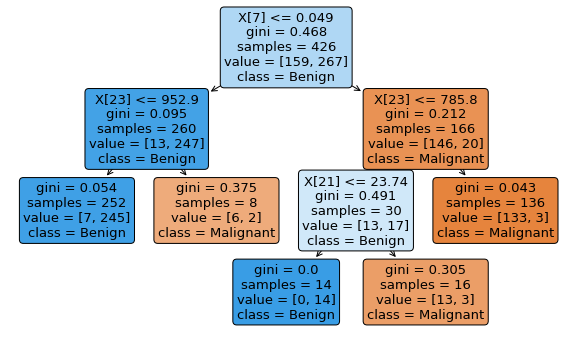

In [50]:
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, filled=True, rounded=True, class_names=['Malignant', 'Benign']);